In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_theta_result/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_theta_result.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
     
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:

track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [14]:
def draw_adding():
    prelim = ROOT.TLatex(0.95,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/23.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/23.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [15]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [16]:
path_cv = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#path_cv = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_theta_wighted.root", 'read')

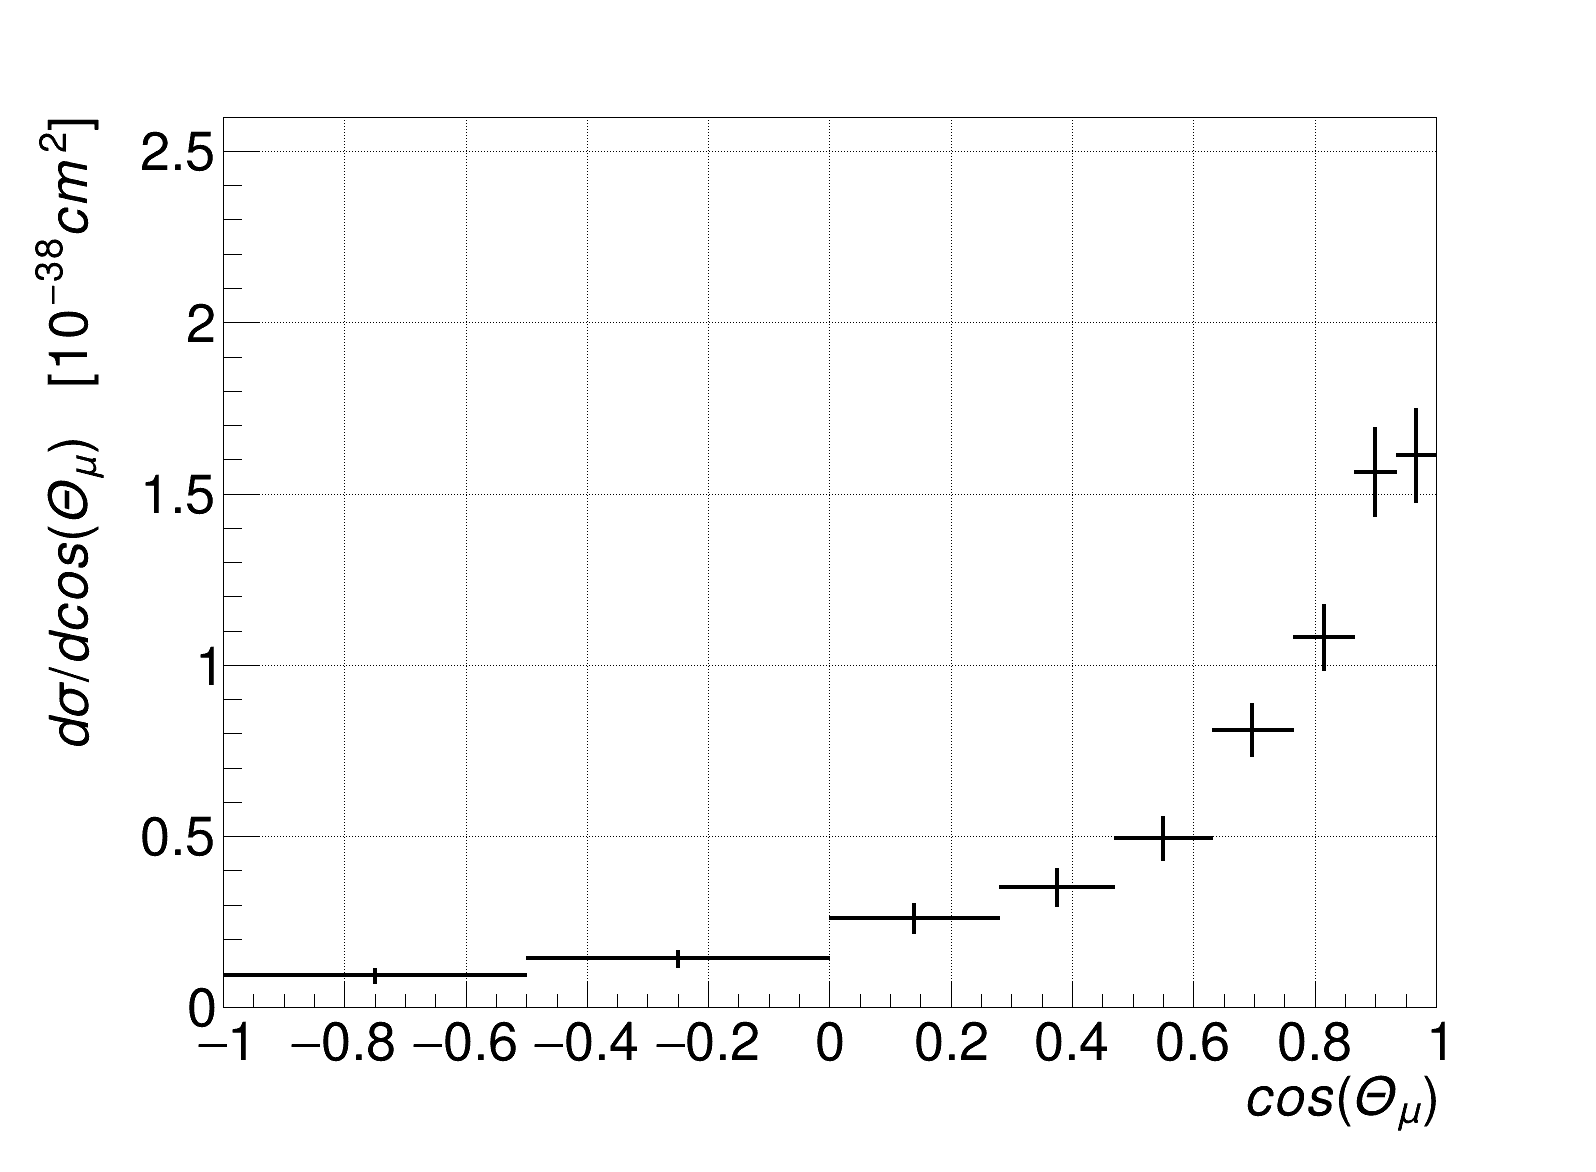

In [17]:
h_data = f_cv.Get('h_data')
h_ext = f_cv.Get('h_ext')
h_dirt = f_cv.Get('h_dirt')
h_overlay = f_cv.Get('h_overlay')
h_eff_true = f_cv.Get('h_eff_true')
h_eff_tilde = f_cv.Get('h_eff_tilde')
h_xsec_data = f_cv.Get('h_xsec_data_theta')
h_xsec_MC = f_cv.Get('h_xsec_MC_theta')
h_xsec_MC_noTune = f_cv.Get('h_xsec_MC_theta_noTune')
h_smearing_matrix = f_cv.Get('h_mitigation_matrix_theta')

h_xsec_QE = f_cv.Get('h_xsec_QE')
h_xsec_MEC = f_cv.Get('h_xsec_MEC')
h_xsec_RES = f_cv.Get('h_xsec_RES')
h_xsec_DIS = f_cv.Get('h_xsec_DIS')


h_xsec_data.Draw()
c1.Draw()

In [18]:
path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_all_combine_theta_mar18/'
f_all_genie = ROOT.TFile.Open(path_all+"xsec_genie_all_combine_theta.root", 'read')
h_covariance_all_genie = f_all_genie.Get('h_covariance')

path_genie_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_genie_other_mar18/'
f_genie_other = ROOT.TFile.Open(path_genie_other+"genie_other_theta_systematic.root", 'read')
h_covariance_other_genie = f_genie_other.Get('h_covariance')

path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all/'
f_detsys = ROOT.TFile.Open(path_detsys+"Detector_systematic_theta.root", 'read')
h_covariance_detsys = f_detsys.Get('h_covariance')

path_flux = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/Flux/output/'
f_flux = ROOT.TFile.Open(path_flux+"Flux_systematic_theta.root", 'read')
h_covariance_flux = f_flux.Get('h_covariance')

#path_crt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_cross_check/'
#f_crt = ROOT.TFile.Open(path_crt+"xsec_crtsys_theta.root", 'read')
path_crt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_crt_sys_2/'
f_crt = ROOT.TFile.Open(path_crt+"crt_covariance.root", 'read')
h_covariance_crt = f_crt.Get('h_covariance_theta')

path_dirt = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/'
f_dirt = ROOT.TFile.Open(path_dirt+"dirt_covariance.root", 'read')
h_covariance_dirt = f_dirt.Get('h_covariance_theta')

#path_G4 = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_G4_theta/'
#f_G4 = ROOT.TFile.Open(path_G4+"G4_systematic_combine_theta.root", 'read')
#h_covariance_G4 = f_G4.Get('h_covariance')

h_covariance_tot = h_covariance_all_genie.Clone()
h_covariance_tot.Add(h_covariance_other_genie)
h_covariance_tot.Add(h_covariance_detsys)
h_covariance_tot.Add(h_covariance_flux)
h_covariance_tot.Add(h_covariance_crt)
h_covariance_tot.Add(h_covariance_dirt)
#h_covariance_tot.Add(h_covariance_G4)

h_cov_stat = h_covariance_tot.Clone()
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        if(i==j):
            h_cov_stat.SetBinContent(i,j,h_xsec_data.GetBinError(i)*h_xsec_data.GetBinError(j)*1e-76)
        else:
            h_cov_stat.SetBinContent(i,j,0.0)

            
h_cov_POT = h_covariance_tot.Clone()
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        #if(i==j):
        h_cov_POT.SetBinContent(i,j,h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j)*0.02*0.02*1e-76)        
        #else:
        #    h_cov_POT.SetBinContent(i,j,0.0)

h_covariance_tot.Add(h_cov_stat)
h_covariance_tot.Add(h_cov_POT)

True

Warning in <TFile::Init>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_all_combine_theta_mar18/xsec_genie_all_combine_theta.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_all_combine_theta_mar18/xsec_genie_all_combine_theta.root, recovered key TH2D:h_correlation at address 454
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_all_combine_theta_mar18/xsec_genie_all_combine_theta.root, recovered key TH2D:h_covariance at address 1356
Info in <TFile::Recover>: /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_all_combine_theta_mar18/xsec_genie_all_combine_theta.root, recovered key TH2F:h_frac_covariance at address 2323
Warning in <TFile::Init>: successfully recovered 3 keys
Warning in <TFile::Init>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_detsys_all/Detector_s

In [19]:
cov_matrix = np.zeros((binnum,binnum))
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        cov_matrix[i-1][j-1]=h_covariance_tot.GetBinContent(i,j)*1e76
xsec_diff = np.zeros((binnum))
for i in range(1,binnum+1):
    xsec_diff[i-1] = (h_xsec_data.GetBinContent(i) - h_xsec_MC.GetBinContent(i) )#*1e-38
cov_matrix_inv = np.linalg.inv(cov_matrix)

#print xsec_diffh_covariance_tot
#print np.transpose(xsec_diff)

chi2 = np.dot(xsec_diff,cov_matrix_inv)
chi2 = np.dot(chi2,xsec_diff)
print chi2
print chi2/binnum

2.3852372665055683
0.26502636294506315


In [20]:
cov_matrix = np.zeros((binnum,binnum))
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        cov_matrix[i-1][j-1]=h_covariance_tot.GetBinContent(i,j)*1e76
xsec_diff = np.zeros((binnum))
for i in range(1,binnum+1):
    xsec_diff[i-1] = (h_xsec_data.GetBinContent(i) - h_xsec_MC_noTune.GetBinContent(i) )#*1e-38
cov_matrix_inv = np.linalg.inv(cov_matrix)

#print xsec_diffh_covariance_tot
#print np.transpose(xsec_diff)

chi2 = np.dot(xsec_diff,cov_matrix_inv)
chi2 = np.dot(chi2,xsec_diff)
print chi2
print chi2/binnum

3.74822848724704
0.4164698319163378


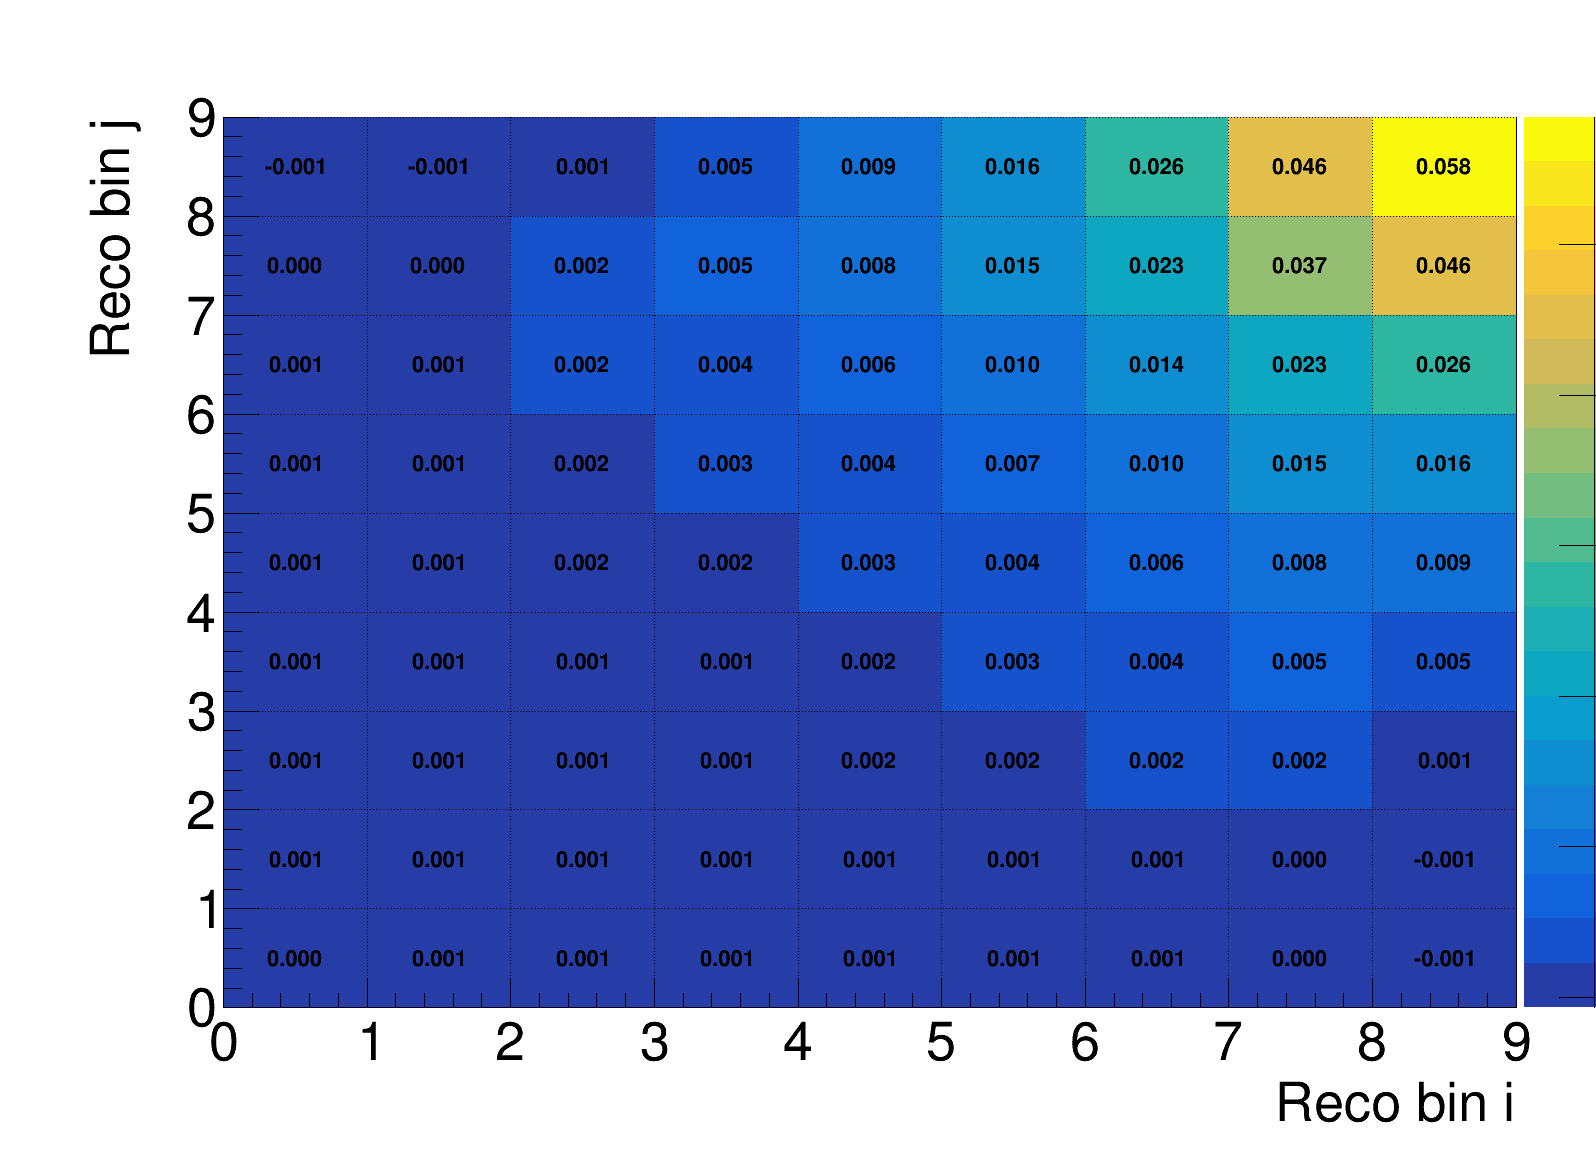

In [34]:
test = h_covariance_flux.Clone()
test.Scale(1e76)
#test.Add(h_covariance_all_genie)
#test.Add(h_covariance_other_genie)
#test.Add(h_covariance_flux)
#test.Add(h_covariance_crt)
#test.Add(h_covariance_G4)
#test = f_flux.Get('h_frac_covariance')
test.Draw('colz')
test.Draw('Text same')
c1.Draw()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_covar_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_covar_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_covar_theta.pdf has been created


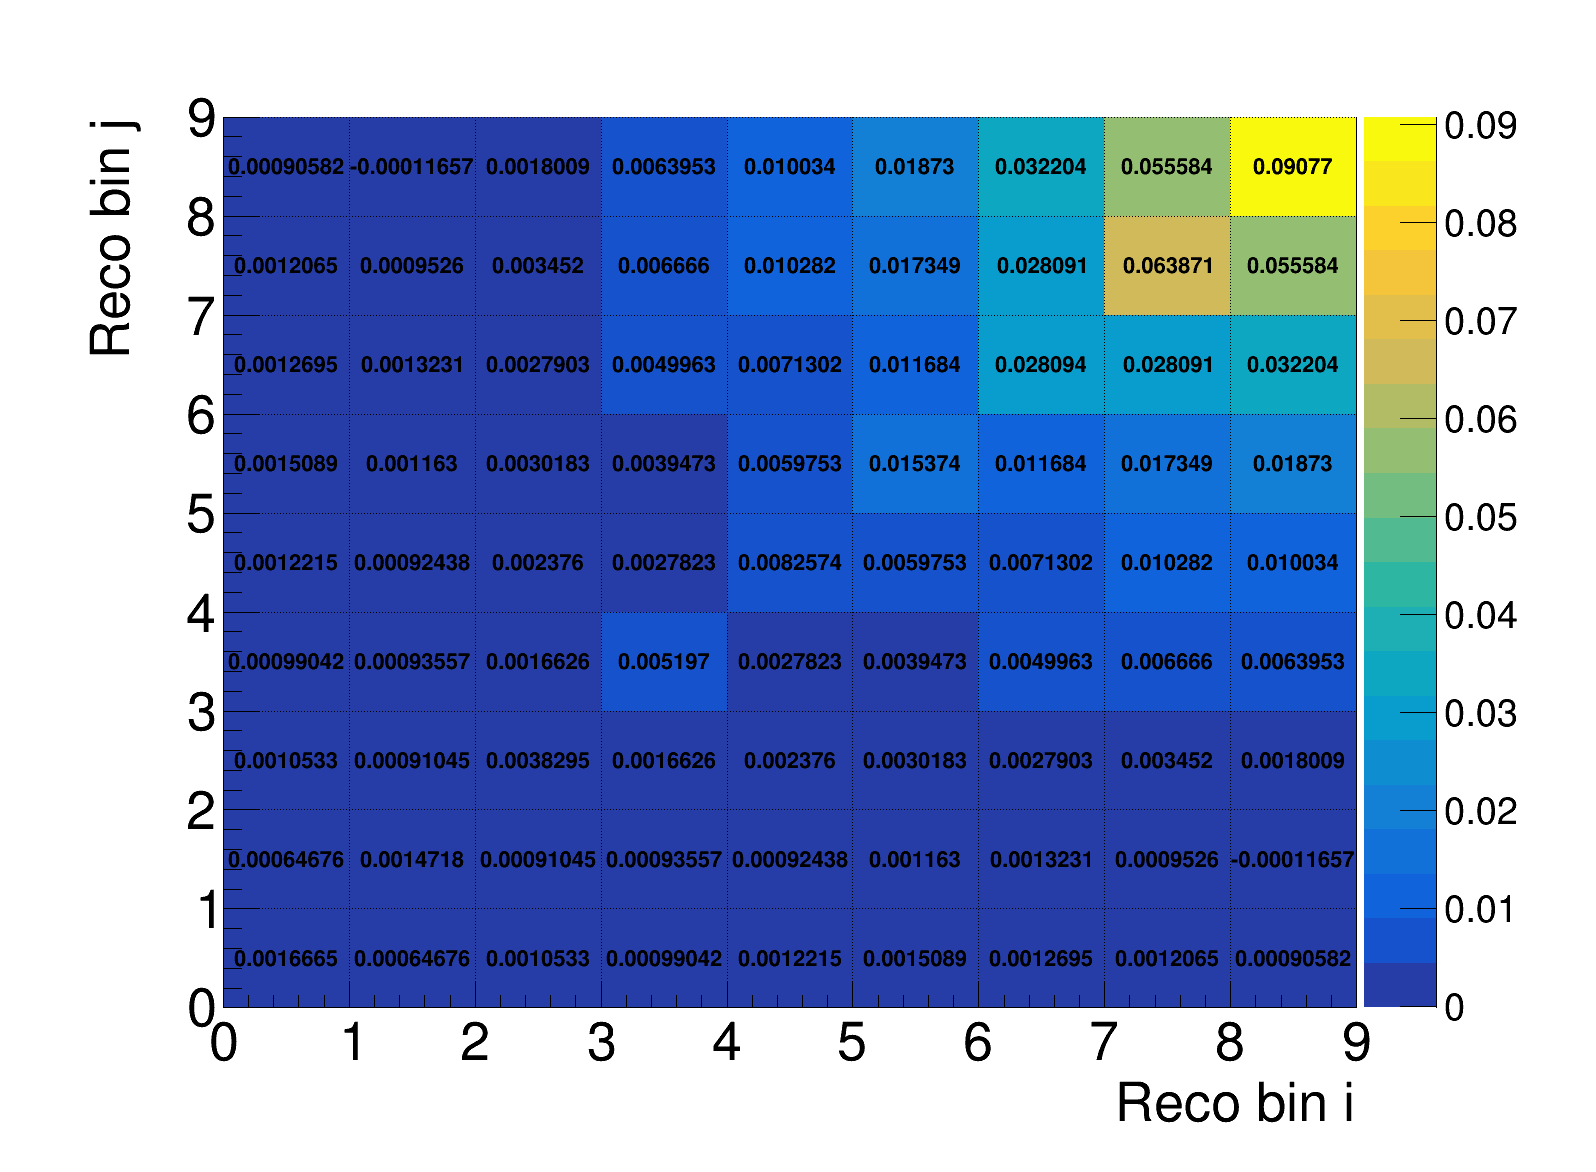

In [22]:
test = h_covariance_tot.Clone()
test.Scale(1e76)

#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.5g')

test.Draw('colz')
test.Draw('Text same')
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_covar_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_covar_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_covar_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_frac_covar_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_frac_covar_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_frac_covar_theta.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_sqrt_frac_covar_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_sqrt_frac_covar_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_sqrt_f

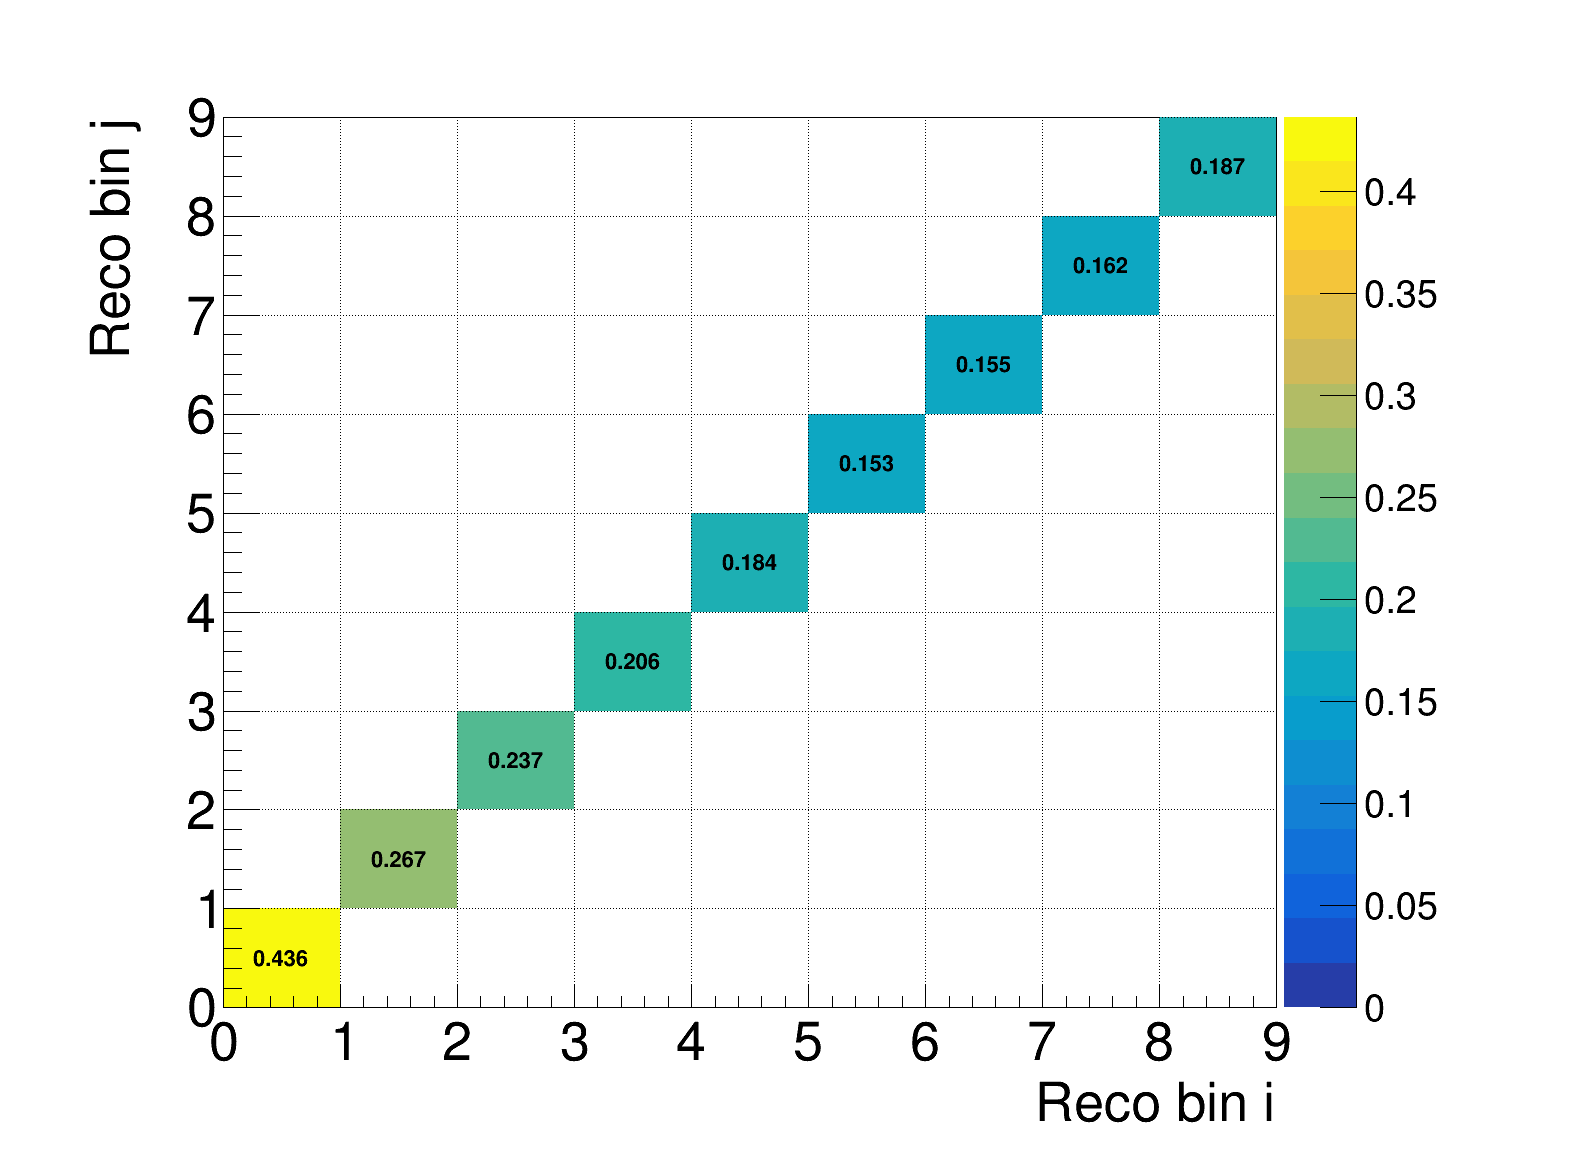

In [23]:
test = h_covariance_tot.Clone()
test.Scale(1e76)
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        test.SetBinContent(i,j,h_covariance_tot.GetBinContent(i,j)/(h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j)*1e-76))
        #print h_covariance_tot.GetBinContent(i,j)/(h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j))
        #print h_covariance_tot.GetBinContent(i,j), h_xsec_data.GetBinContent(i), h_xsec_data.GetBinContent(j)
#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_frac_covar_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_frac_covar_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_frac_covar_theta.pdf")

test = h_covariance_tot.Clone()
test.Scale(1e76)
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        if (i!=j) :
            test.SetBinContent(i,j,0)
        else:
            test.SetBinContent(i,j,math.sqrt(abs(h_covariance_tot.GetBinContent(i,j))/(h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j)*1e-76)))
        #print h_covariance_tot.GetBinContent(i,j)/(h_xsec_data.GetBinContent(i)*h_xsec_data.GetBinContent(j))
        #print h_covariance_tot.GetBinContent(i,j), h_xsec_data.GetBinContent(i), h_xsec_data.GetBinContent(j)
#test = f_flux.Get('h_frac_covariance')
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_sqrt_frac_covar_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_sqrt_frac_covar_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_sqrt_frac_covar_theta.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_correlation_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_correlation_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_correlation_theta.pdf has been created


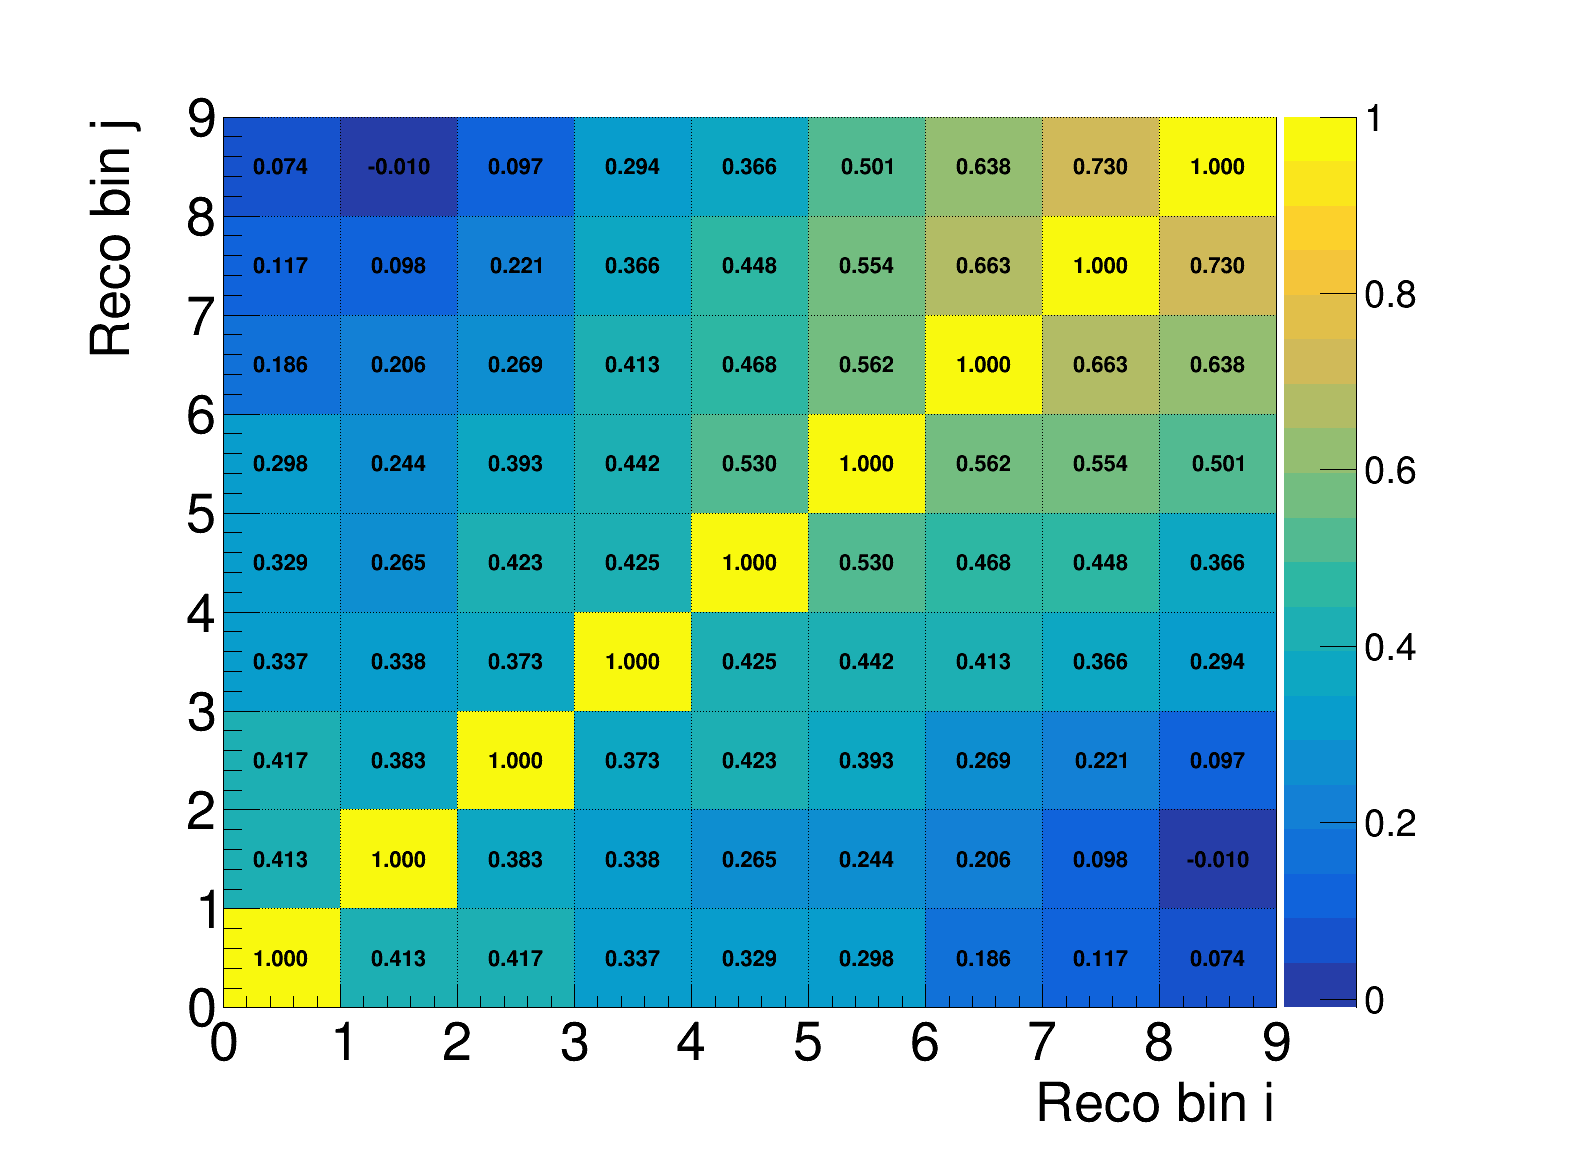

In [24]:
  
test = h_covariance_tot.Clone()
test.Scale(1e76)
for i in range(1,binnum+1):
    for j in range(1,binnum+1):
        test.SetBinContent(i,j,h_covariance_tot.GetBinContent(i,j)/math.sqrt(h_covariance_tot.GetBinContent(i,i)*h_covariance_tot.GetBinContent(j,j)))

ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')

test.Draw('colz')
test.Draw('Text same')
c1.SetRightMargin(0.2)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_correlation_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_correlation_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_correlation_theta.pdf")

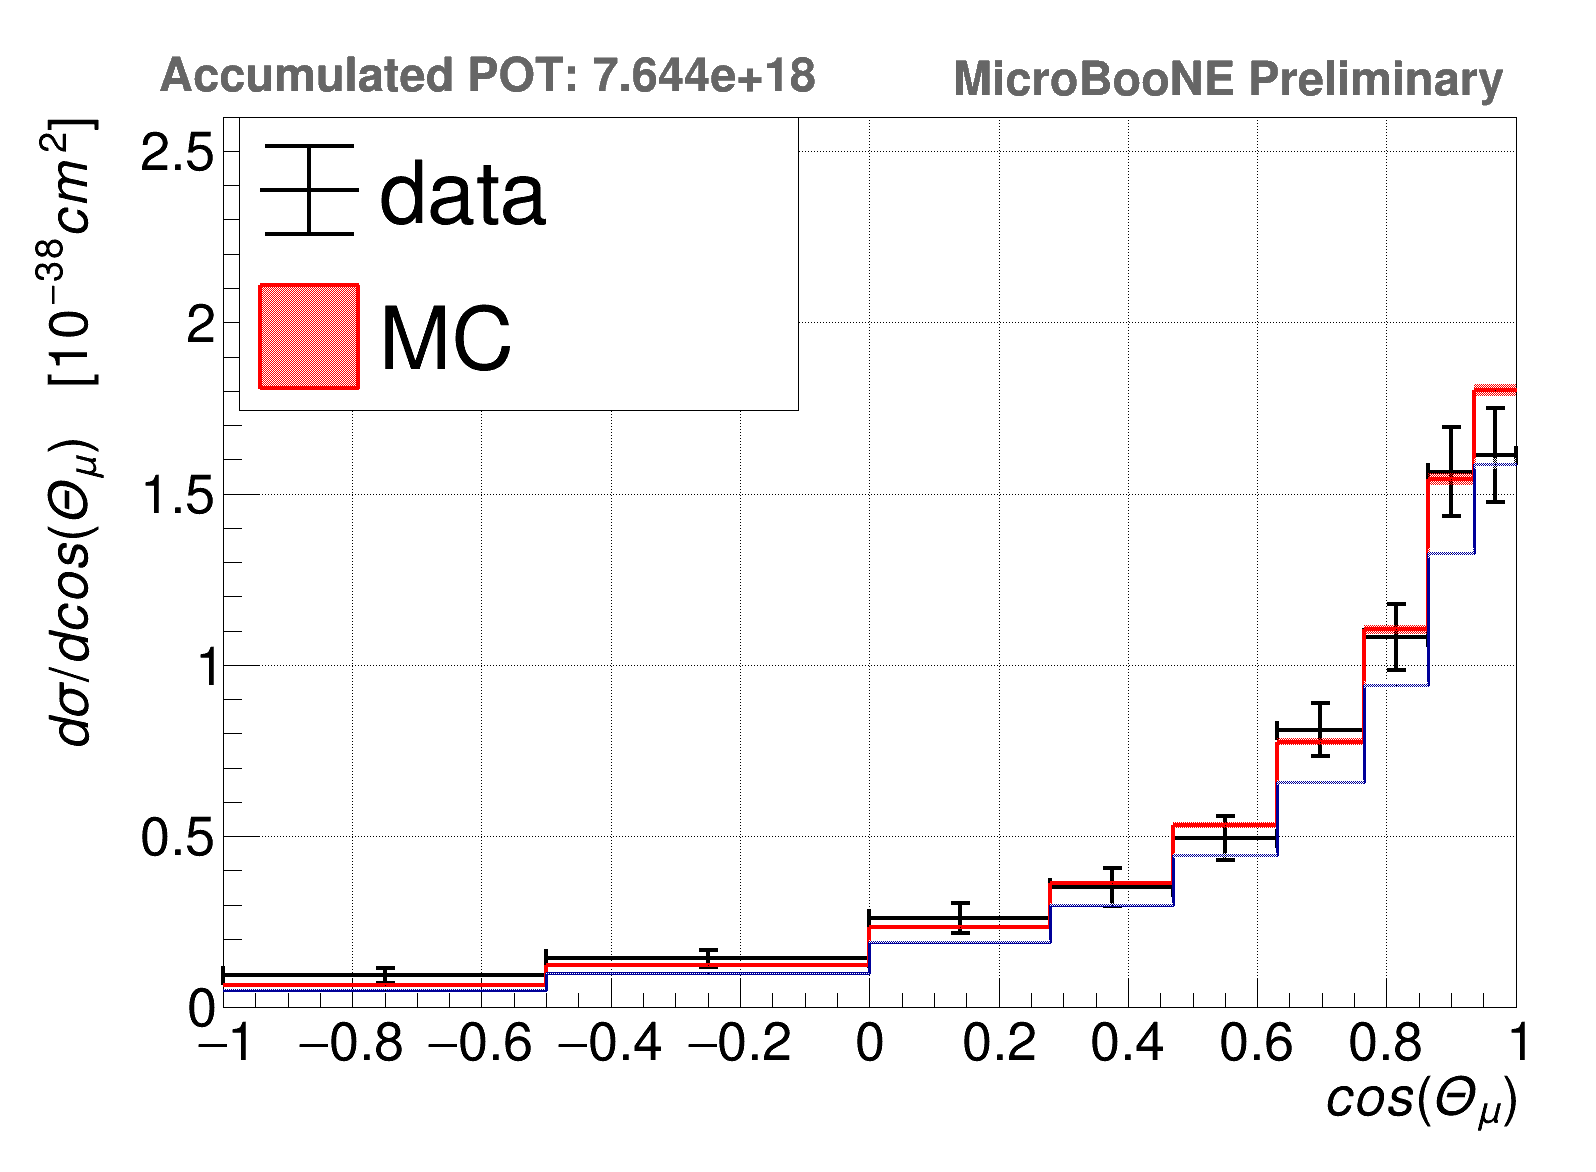

In [25]:
legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
c1.SetRightMargin(0.05)

h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_xsec_data,'data',"lep");
legend.AddEntry(h_xsec_MC,'MC',"f");
h_xsec_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_xsec_data.SetXTitle("cos(\Theta_{\mu})")
h_xsec_data.SetLineWidth(3)
h_xsec_data.SetMaximum(2.6)
h_xsec_data.SetMinimum(0)

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_xsec_data.Draw('E1')
h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.DrawCopy('Hist same')
h_xsec_MC.SetFillColor(2)
h_xsec_MC.SetFillStyle(3001)
h_xsec_MC.Draw('E2 same')

h_xsec_MC_noTune.SetFillColor(0)
h_xsec_MC_noTune.SetLineWidth(3)
#h_overlay_sig.Draw('hist same')
h_xsec_MC_noTune.DrawCopy('Hist same')
h_xsec_MC_noTune.SetLineColor(ROOT.kBlue)
h_xsec_MC_noTune.SetFillStyle(3001)
h_xsec_MC_noTune.Draw('E2 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
#c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
#c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
#c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")

h_stat = h_xsec_data.Clone()

Bin  1 0.0935946255922  stat. err:  0.025438611802  fractional:  0.271795646823
Bin  2 0.143484219909  stat. err:  0.00440806457923  fractional:  0.0307215983892
Bin  3 0.261268973351  stat. err:  0.00758662988585  fractional:  0.0290376227554
Bin  4 0.350640892982  stat. err:  0.0107469783124  fractional:  0.0306495292692
Bin  5 0.494557261467  stat. err:  0.0108794010173  fractional:  0.0219982636289
Bin  6 0.811181724072  stat. err:  0.0138048918213  fractional:  0.0170182480838
Bin  7 1.08231794834  stat. err:  0.0167074013305  fractional:  0.0154366850851
Bin  8 1.56405210495  stat. err:  0.0239225469934  fractional:  0.0152952365958
Bin  9 1.61326181889  stat. err:  0.0512544531505  fractional:  0.0317706974469
Bin  9
stat_err:  1.8826621578e-78
pot_err:  1.04104547851e-79
All_Genie:  1.32711590305e-79
genie_other_err:  3.77317824196e-80
detsys_err:  8.11065879202e-79
flux_err:  5.84579564723e-78
crt_err:  2.19013748006e-82


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_sys_all_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_sys_all_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_sys_all_theta.pdf has been created


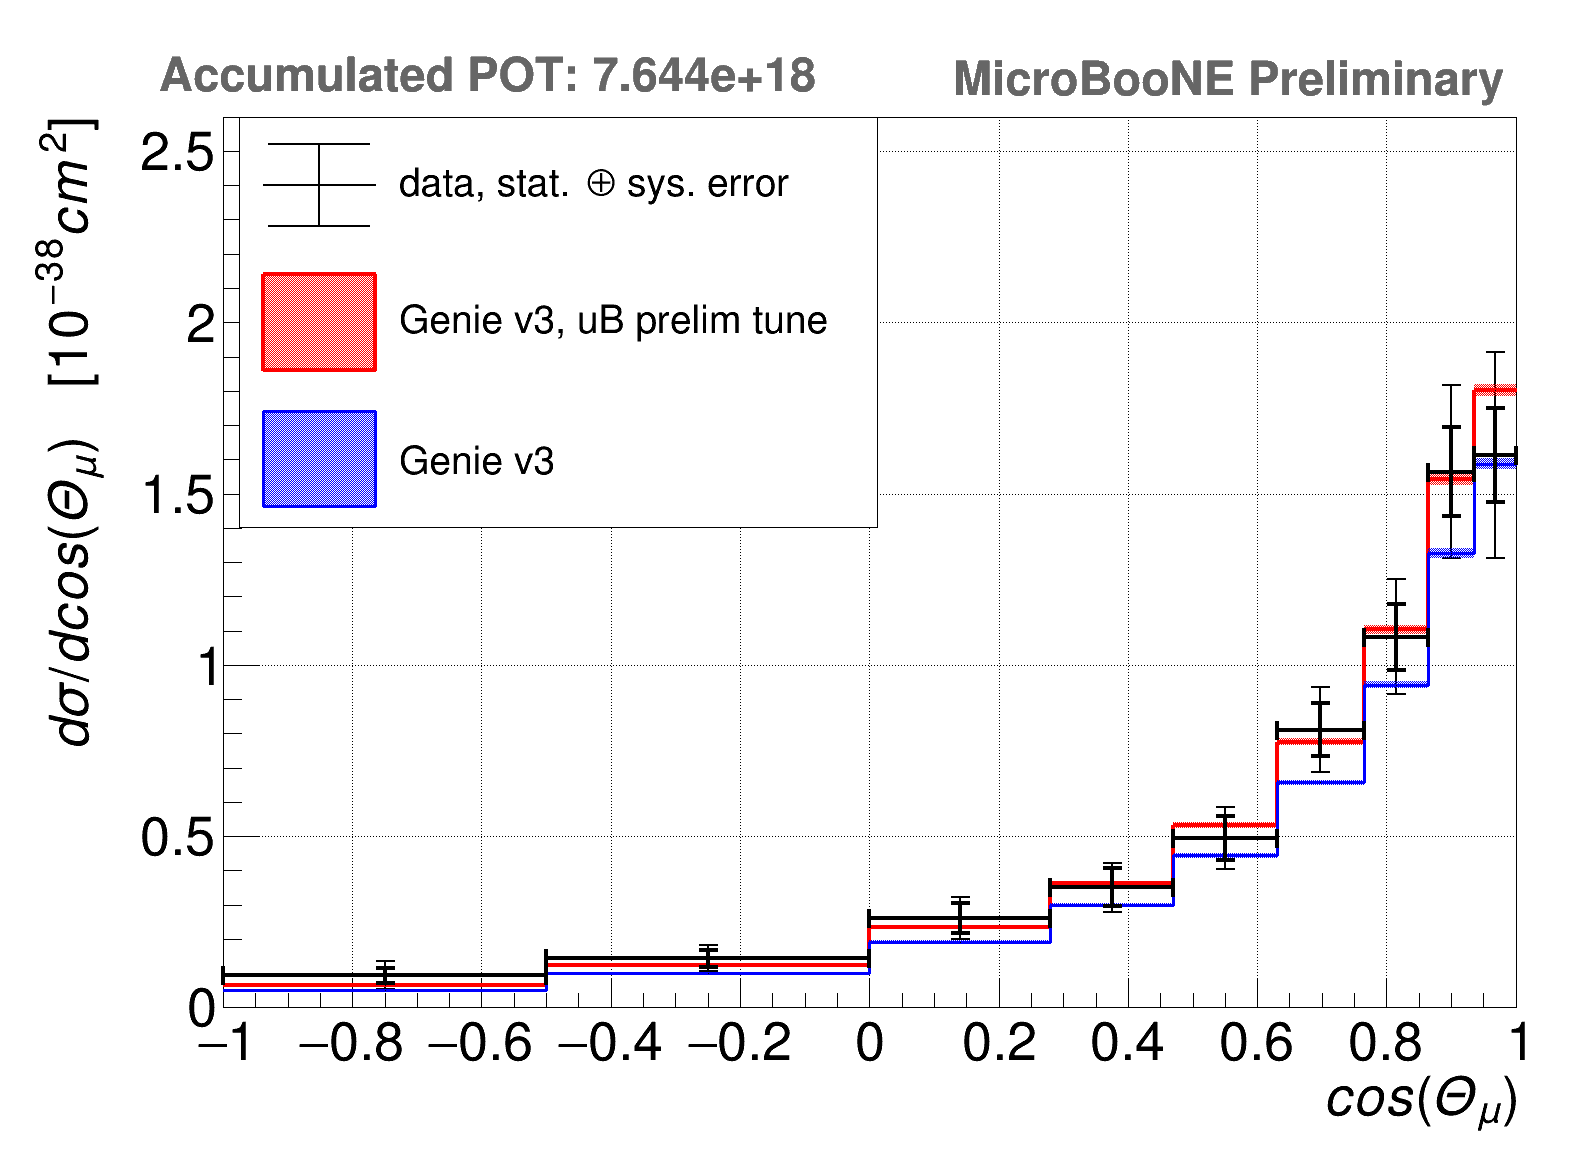

In [26]:
#all systematics
legend = ROOT.TLegend(0.15,0.55,0.55,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_xsec_data,'data, stat. #oplus sys. error',"lep");
legend.AddEntry(h_xsec_MC,'Genie v3, uB prelim tune',"f");
legend.AddEntry(h_xsec_MC_noTune,'Genie v3',"f");

c1.SetRightMargin(0.05)
ROOT.gStyle.SetEndErrorSize(9)

stat_err_arr = np.zeros((binnum))
pot_err_arr = np.zeros((binnum))
genie_all_err_arr = np.zeros((binnum))
genie_other_arr = np.zeros((binnum))
det_err_arr = np.zeros((binnum))
flux_err_arr = np.zeros((binnum))
crt_err_arr = np.zeros((binnum))
#G4_err_arr = np.zeros((binnum))
dirt_err_arr = np.zeros((binnum))
tot_err_arr = np.zeros((binnum))


for i in range(1,binnum+1):
    stat_err = h_stat.GetBinError(i)
    stat_err = stat_err*stat_err
    pot_err = h_stat.GetBinContent(i)*0.02
    pot_err = pot_err*pot_err
    #crt_err = h_stat.GetBinContent(i)*0.01648
    #crt_err = crt_err*crt_err
    genie_all_err = h_covariance_all_genie.GetBinContent(i,i)*1e76
    genie_other_err = h_covariance_other_genie.GetBinContent(i,i)*1e76
    detsys_err = h_covariance_detsys.GetBinContent(i,i)*1e76
    flux_err = h_covariance_flux.GetBinContent(i,i)*1e76
    crt_err = h_covariance_crt.GetBinContent(i,i)*1e76
    #G4_err = h_covariance_G4.GetBinContent(i,i)*1e76
    dirt_err = h_covariance_dirt.GetBinContent(i,i)*1e76
    
    stat_err_arr[i-1] = math.sqrt(stat_err)
    pot_err_arr[i-1] = math.sqrt(pot_err)
    genie_all_err_arr[i-1] = math.sqrt(genie_all_err)
    genie_other_arr[i-1] = math.sqrt(genie_other_err)
    det_err_arr[i-1] = math.sqrt(detsys_err)
    flux_err_arr[i-1] = math.sqrt(flux_err)
    crt_err_arr[i-1] = math.sqrt(crt_err)
    #G4_err_arr[i-1] = math.sqrt(G4_err)
    dirt_err_arr[i-1] = math.sqrt(dirt_err)
    
    #print stat_err,genie_all_err,genie_other_err,detsys_err,flux_err,G4_err
    #print 'Bin ',i, h_xsec_data.GetBinContent(i)
    
    print 'Bin ',i, h_xsec_data.GetBinContent(i), ' stat. err: ',math.sqrt(dirt_err),' fractional: ',math.sqrt(dirt_err)/h_xsec_data.GetBinContent(i)
    
    #print 'stat_err: ' ,math.sqrt(stat_err),math.sqrt(stat_err)/h_xsec_data.GetBinContent(i)
    #print 'genie_all_err: ',genie_all_err/1e76 ,math.sqrt(genie_all_err)
    #print 'stat_err: ',stat_err/1e76 ,math.sqrt(stat_err)/h_xsec_data.GetBinContent(i)
    #print 'pot_err: ',pot_err/1e76 ,math.sqrt(pot_err)/h_xsec_data.GetBinContent(i)
    #print 'All_Genie: ',genie_all_err/1e76 ,math.sqrt(genie_all_err)/h_xsec_data.GetBinContent(i)
    #print 'genie_other_err: ',genie_other_err/1e76 ,math.sqrt(genie_other_err)/h_xsec_data.GetBinContent(i)
    #print 'G4_err: ',G4_err/1e76 ,math.sqrt(G4_err)/h_xsec_data.GetBinContent(i)
    #print 'detsys_err: ',detsys_err/1e76 ,math.sqrt(detsys_err)/h_xsec_data.GetBinContent(i)
    #print 'flux_err: ',flux_err/1e76 ,math.sqrt(flux_err)/h_xsec_data.GetBinContent(i)
    #print 'crt_err: ',crt_err/1e76 ,math.sqrt(crt_err)/h_xsec_data.GetBinContent(i)
    h_xsec_data.SetBinError(i,math.sqrt(stat_err+pot_err+crt_err+genie_all_err+genie_other_err+detsys_err+flux_err+dirt_err))
    tot_err_arr[i-1] = h_xsec_data.GetBinError(i)
        
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/stat_err_arr_theta',stat_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/pot_err_arr_theta',pot_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/genie_all_err_arr_theta',genie_all_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/genie_other_arr_theta',genie_other_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/det_err_arr_theta',det_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/flux_err_arr_theta',flux_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/crt_err_arr_theta',crt_err_arr)
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/G4_err_arr_theta',G4_err_arr)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/tot_err_arr_theta',tot_err_arr)


h_xsec_data.SetLineWidth(2)
h_xsec_data.Draw('E1')

h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.DrawCopy('Hist same')
h_xsec_MC.SetFillColor(2)
h_xsec_MC.SetFillStyle(3001)
h_xsec_MC.Draw('E2 same')

#h_xsec_MC_noTune.SetLineColor(ROOT.kBlue)
#h_xsec_MC_noTune.SetLineWidth(3)
#h_xsec_MC_noTune.Draw('same hist')

h_xsec_MC_noTune.SetFillColor(0)
h_xsec_MC_noTune.SetLineWidth(3)
#h_overlay_sig.Draw('hist same')
h_xsec_MC_noTune.DrawCopy('Hist same')
h_xsec_MC_noTune.SetFillColor(ROOT.kBlue)
h_xsec_MC_noTune.SetFillStyle(3001)
h_xsec_MC_noTune.Draw('E2 same')

h_stat.Draw('E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_sys_all_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_sys_all_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_sys_all_theta.pdf")

print 'Bin ',i
print 'stat_err: ',stat_err/1e76
print 'pot_err: ',pot_err/1e76
print 'All_Genie: ',genie_all_err/1e76
print 'genie_other_err: ',genie_other_err/1e76
#print 'G4_err: ',G4_err/1e76
print 'detsys_err: ',detsys_err/1e76
print 'flux_err: ',flux_err/1e76
print 'crt_err: ',crt_err/1e76


In [27]:
path_result = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
#path_cv = '/home/tmettler/Desktop/weighted/xsec_phasespacerestriction/'
f_result = ROOT.TFile.Open(path_result+"xsec_theta_result.root", 'recreate')
h_xsec_data.Write('xsec_data')
h_xsec_MC.Write('xsec_mc')
h_xsec_MC_noTune.Write('xsec_mc_noTune')
h_covariance_tot.Scale(1e38*1e38)
h_covariance_tot.Write('covariance_matrix')
h_smearing_matrix.Write('smearing_matrix')
RootFile.Close()
f_result.Close()

In [28]:
res = np.zeros((9))
chi2_nom =h_xsec_data.Chi2Test(h_xsec_MC,"P CHI2",res)
chi2_nom =h_xsec_data.Chi2Test(h_xsec_MC_noTune,"P CHI2",res)
#zdfzzdf

Chi2 = 1.601507, Prob = 0.990891, NDF = 8, igood = 1
Chi2 = 2.496760, Prob = 0.961882, NDF = 8, igood = 1


Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.



Bin  1
Total error:  0.0349213406472  fractional error:  0.373112669945
Bin  2
Total error:  0.0287545425283  fractional error:  0.200402124684
Bin  3
Total error:  0.0434686491564  fractional error:  0.166375090769
Bin  4
Total error:  0.0458680100611  fractional error:  0.130811924619
Bin  5
Total error:  0.0647706078083  fractional error:  0.130966852284
Bin  6
Total error:  0.0960673571281  fractional error:  0.118428897345
Bin  7
Total error:  0.137045315406  fractional error:  0.126622048184
Bin  8
Total error:  0.217221983911  fractional error:  0.138884109566
Bin  9
Total error:  0.268222488944  fractional error:  0.166260978723


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_sys_only_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_sys_only_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_sys_only_theta.pdf has been created


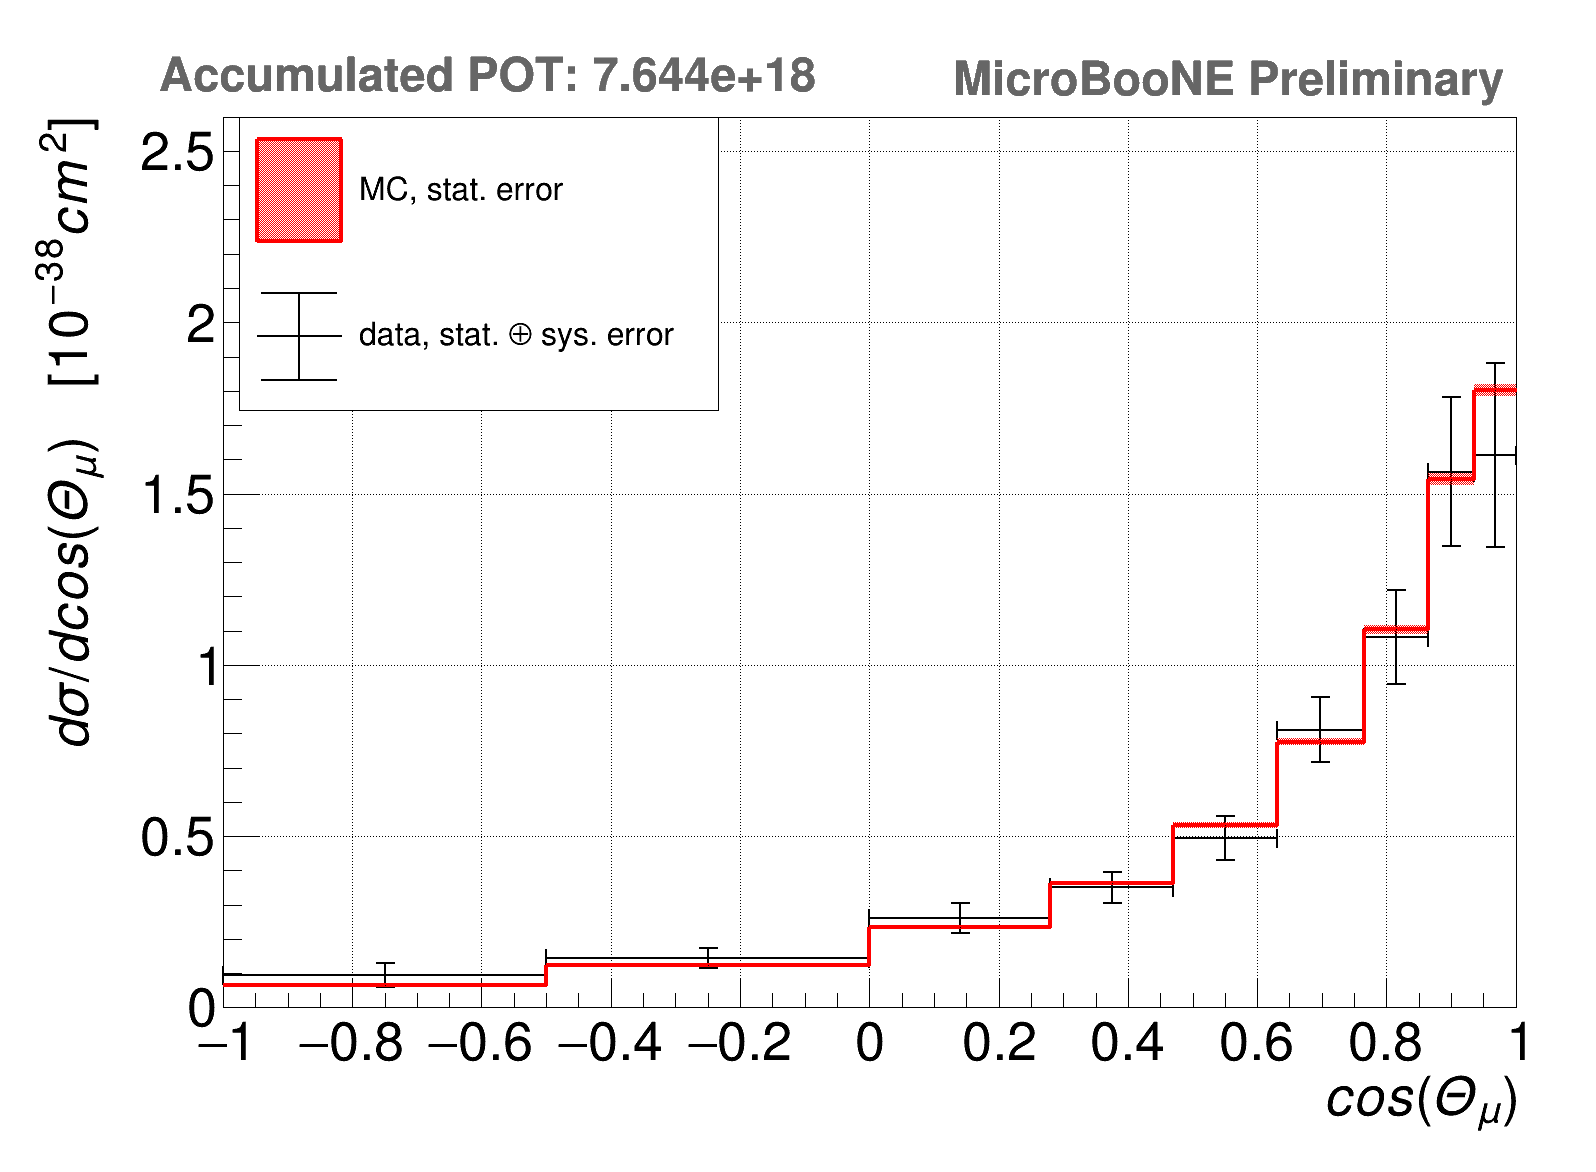

In [29]:
#all systematics
legend = ROOT.TLegend(0.15,0.65,0.45,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_xsec_MC,'MC, stat. error',"f");
legend.AddEntry(h_xsec_data,'data, stat. #oplus sys. error',"lep");
c1.SetRightMargin(0.05)
ROOT.gStyle.SetEndErrorSize(9)
for i in range(1,binnum+1):   
    stat_err = h_stat.GetBinError(i)
    stat_err = stat_err*stat_err
    pot_err = h_stat.GetBinContent(i)*0.02
    pot_err = pot_err*pot_err
    #crt_err = h_stat.GetBinContent(i)*0.01648
    #crt_err = crt_err*crt_err
    genie_all_err = h_covariance_all_genie.GetBinContent(i,i)*1e76
    genie_other_err = h_covariance_other_genie.GetBinContent(i,i)*1e76
    detsys_err = h_covariance_detsys.GetBinContent(i,i)*1e76
    flux_err = h_covariance_flux.GetBinContent(i,i)*1e76
    crt_err = h_covariance_crt.GetBinContent(i,i)*1e76
    #G4_err = h_covariance_G4.GetBinContent(i,i)*1e76
    dirt_err = h_covariance_dirt.GetBinContent(i,i)*1e76
    #print stat_err,genie_all_err,genie_other_err,detsys_err,flux_err,G4_err
    print 'Bin ',i
    #print 'stat_err: ',stat_err/1e76
    #print 'pot_err: ',pot_err/1e76
    #print 'All_Genie: ',genie_all_err/1e76
    #print 'genie_other_err: ',genie_other_err/1e76
    #print 'G4_err: ',G4_err/1e76
    #print 'detsys_err: ',detsys_err/1e76
    #print 'flux_err: ',flux_err/1e76
    #print 'crt_err: ',crt_err/1e76
    #print 'dirt_err: ',dirt_err/1e76
    
    h_xsec_data.SetBinError(i,math.sqrt(0*stat_err+pot_err+crt_err+genie_all_err+genie_other_err+detsys_err+flux_err+dirt_err))
    print 'Total error: ',h_xsec_data.GetBinError(i),' fractional error: ',h_xsec_data.GetBinError(i)/h_xsec_data.GetBinContent(i)

h_xsec_data.SetLineWidth(2)
h_xsec_data.Draw('E1')
h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.DrawCopy('Hist same')
h_xsec_MC.SetFillColor(2)
h_xsec_MC.SetFillStyle(3001)
h_xsec_MC.Draw('E2 same')
#h_stat.Draw('E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_sys_only_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_sys_only_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_sys_only_theta.pdf")


Bin  1
Total error:  0.0408224198718  fractional error:  0.43616200838
Bin  2
Total error:  0.0383643639229  fractional error:  0.267376886094
Bin  3
Total error:  0.0618826218836  fractional error:  0.236854078347
Bin  4
Total error:  0.0720905676827  fractional error:  0.205596577939
Bin  5
Total error:  0.0908701714697  fractional error:  0.183740445343
Bin  6
Total error:  0.123993893583  fractional error:  0.152855876684
Bin  7
Total error:  0.16761260165  fractional error:  0.154864475737
Bin  8
Total error:  0.252726989912  fractional error:  0.161584763776
Bin  9
Total error:  0.301280475891  fractional error:  0.186752374825


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_tot_sys_channel_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_tot_sys_channel_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_tot_sys_channel_theta.pdf has been created


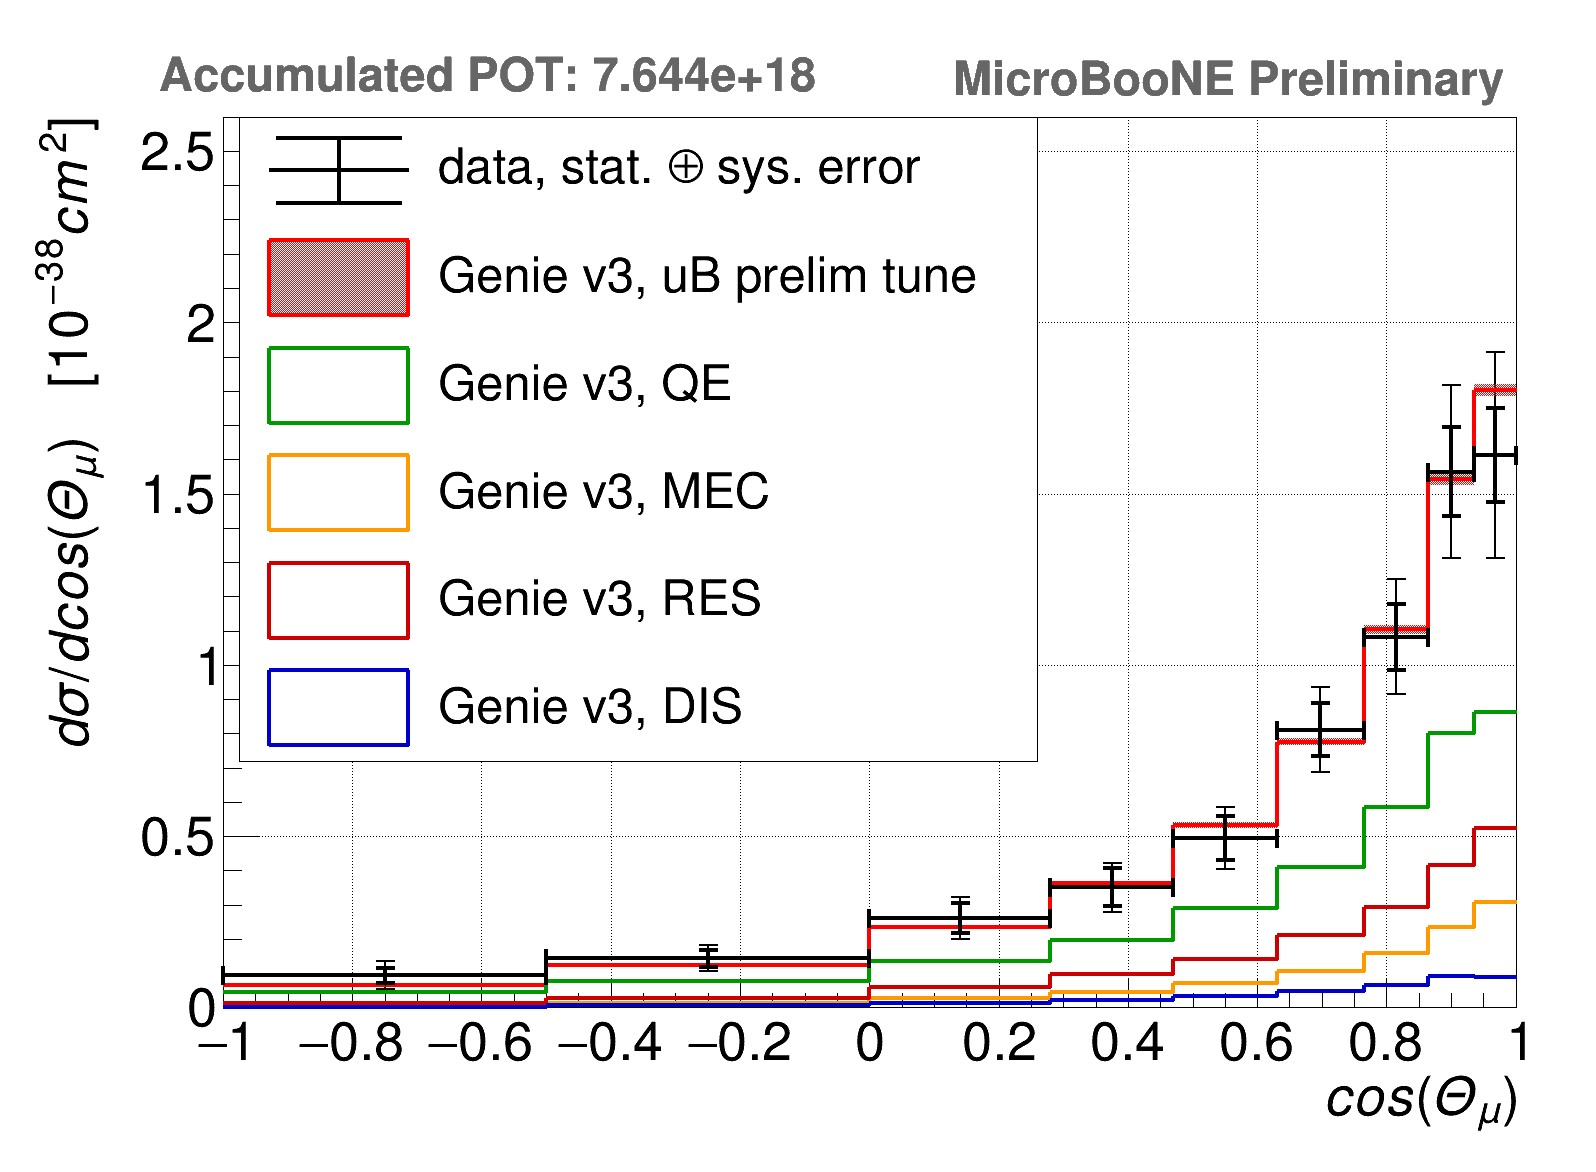

In [30]:
#all systematics
legend = ROOT.TLegend(0.15,0.35,0.65,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_stat,'data, stat. #oplus sys. error',"lep");
legend.AddEntry(h_xsec_MC,'Genie v3, uB prelim tune',"f");
legend.AddEntry(h_xsec_QE,'Genie v3, QE',"f");
legend.AddEntry(h_xsec_MEC,'Genie v3, MEC',"f");
legend.AddEntry(h_xsec_RES,'Genie v3, RES',"f");
legend.AddEntry(h_xsec_DIS,'Genie v3, DIS',"f");

c1.SetRightMargin(0.05)
ROOT.gStyle.SetEndErrorSize(9)
for i in range(1,binnum+1):
    stat_err = h_stat.GetBinError(i)
    stat_err = stat_err*stat_err
    pot_err = h_stat.GetBinContent(i)*0.02
    pot_err = pot_err*pot_err
    genie_all_err = h_covariance_all_genie.GetBinContent(i,i)*1e76
    genie_other_err = h_covariance_other_genie.GetBinContent(i,i)*1e76
    detsys_err = h_covariance_detsys.GetBinContent(i,i)*1e76
    flux_err = h_covariance_flux.GetBinContent(i,i)*1e76
    crt_err = h_covariance_crt.GetBinContent(i,i)*1e76
    #G4_err = h_covariance_G4.GetBinContent(i,i)*1e76
    dirt_err = h_covariance_dirt.GetBinContent(i,i)*1e76
    #G4_err = 0
    print 'Bin ',i

    h_xsec_data.SetBinError(i,math.sqrt(stat_err+pot_err+genie_all_err+genie_other_err+detsys_err+flux_err+crt_err+dirt_err)) # G4_err
    print 'Total error: ',h_xsec_data.GetBinError(i),' fractional error: ',h_xsec_data.GetBinError(i)/h_xsec_data.GetBinContent(i)
h_xsec_data.SetLineWidth(2)
h_xsec_data.Draw('E1')
h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.DrawCopy('Hist same')
h_xsec_MC.SetFillColor(2)
h_xsec_MC.SetFillStyle(3001)
h_xsec_MC.Draw('E2 same')

h_xsec_QE.Draw('same hist')
h_xsec_MEC.Draw('same hist')
h_xsec_RES.Draw('same hist')
h_xsec_DIS.Draw('same hist')

h_stat.Draw('E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_tot_sys_channel_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_tot_sys_channel_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_tot_sys_channel_theta.pdf")


Bin  1
Total error:  0.0408224198718  fractional error:  0.43616200838
Bin  2
Total error:  0.0383643639229  fractional error:  0.267376886094
Bin  3
Total error:  0.0618826218836  fractional error:  0.236854078347
Bin  4
Total error:  0.0720905676827  fractional error:  0.205596577939
Bin  5
Total error:  0.0908701714697  fractional error:  0.183740445343
Bin  6
Total error:  0.123993893583  fractional error:  0.152855876684
Bin  7
Total error:  0.16761260165  fractional error:  0.154864475737
Bin  8
Total error:  0.252726989912  fractional error:  0.161584763776
Bin  9
Total error:  0.301280475891  fractional error:  0.186752374825


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/png/h_xsec_tot_sys_channel_theta_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/root/h_xsec_tot_sys_channel_theta_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_theta_result/pdf/h_xsec_tot_sys_channel_theta_ratio.pdf has been created


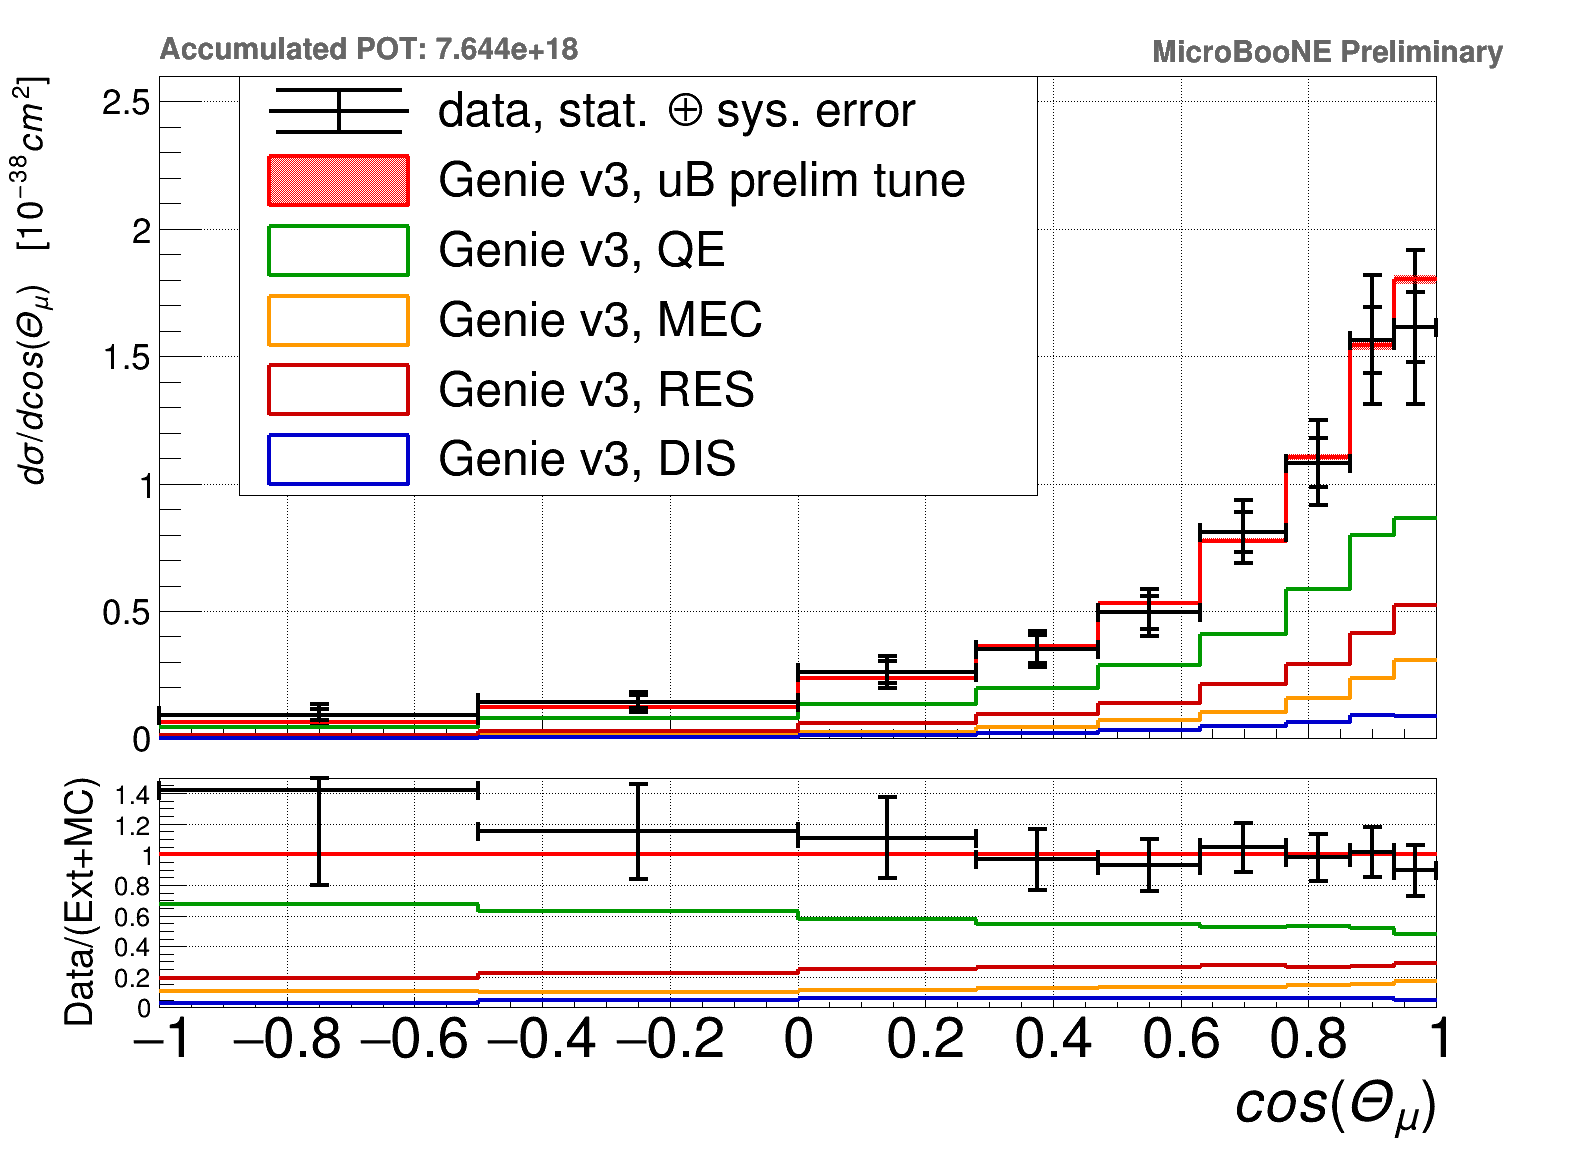

In [31]:
#all systematics
legend = ROOT.TLegend(0.15,0.35,0.65,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_stat,'data, stat. #oplus sys. error',"lep");
legend.AddEntry(h_xsec_MC,'Genie v3, uB prelim tune',"f");
legend.AddEntry(h_xsec_QE,'Genie v3, QE',"f");
legend.AddEntry(h_xsec_MEC,'Genie v3, MEC',"f");
legend.AddEntry(h_xsec_RES,'Genie v3, RES',"f");
legend.AddEntry(h_xsec_DIS,'Genie v3, DIS',"f");

c1.SetRightMargin(0.05)
ROOT.gStyle.SetEndErrorSize(9)
for i in range(1,binnum+1):
    stat_err = h_stat.GetBinError(i)
    stat_err = stat_err*stat_err
    pot_err = h_stat.GetBinContent(i)*0.02
    pot_err = pot_err*pot_err
    genie_all_err = h_covariance_all_genie.GetBinContent(i,i)*1e76
    genie_other_err = h_covariance_other_genie.GetBinContent(i,i)*1e76
    detsys_err = h_covariance_detsys.GetBinContent(i,i)*1e76
    flux_err = h_covariance_flux.GetBinContent(i,i)*1e76
    crt_err = h_covariance_crt.GetBinContent(i,i)*1e76
    #G4_err = h_covariance_G4.GetBinContent(i,i)*1e76
    dirt_err = h_covariance_dirt.GetBinContent(i,i)*1e76
    #G4_err = 0
    print 'Bin ',i

    h_xsec_data.SetBinError(i,math.sqrt(stat_err+pot_err+genie_all_err+genie_other_err+detsys_err+flux_err+crt_err+dirt_err)) # G4_err
    print 'Total error: ',h_xsec_data.GetBinError(i),' fractional error: ',h_xsec_data.GetBinError(i)/h_xsec_data.GetBinContent(i)
h_xsec_data.SetLineWidth(2)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.1)

c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_xsec_data.GetYaxis().SetTitleSize(0.05)
h_xsec_data.GetYaxis().SetTitleOffset(0.0)
h_xsec_data.GetYaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleSize(0.05)
h_xsec_data.GetXaxis().SetLabelSize(0.05)
h_xsec_data.GetXaxis().SetTitleOffset(1)
h_xsec_data.SetLineColor(ROOT.kBlack)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMinimum(0)
h_xsec_data.SetMaximum(2.6)

h_xsec_data.Draw('E1')
h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.DrawCopy('Hist same')
h_xsec_MC.SetFillColor(2)
h_xsec_MC.SetFillStyle(3001)
h_xsec_MC.Draw('E2 same')

h_xsec_QE.Draw('same hist')
h_xsec_MEC.Draw('same hist')
h_xsec_RES.Draw('same hist')
h_xsec_DIS.Draw('same hist')

h_stat.Draw('E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()

h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

#h_xsec_MC.SetFillColor(0)

h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_xsec_MC)
h_mc_ratio = h_xsec_MC.Clone()
h_mc_ratio.Divide(h_xsec_MC)

h_QE_ratio = h_xsec_QE.Clone()
h_QE_ratio.Divide(h_xsec_MC)
h_MEC_ratio = h_xsec_MEC.Clone()
h_MEC_ratio.Divide(h_xsec_MC)
h_RES_ratio = h_xsec_RES.Clone()
h_RES_ratio.Divide(h_xsec_MC)
h_DIS_ratio = h_xsec_DIS.Clone()
h_DIS_ratio.Divide(h_xsec_MC)

h_xsec_data_ratio.SetMinimum(0)
h_xsec_data_ratio.SetMaximum(1.5)
h_mc_ratio.SetFillColor(0)
h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)

h_xsec_data_ratio.Draw('E1')
h_mc_ratio.Draw('hist same')
h_QE_ratio.Draw('hist same')
h_MEC_ratio.Draw('hist same')
h_RES_ratio.Draw('hist same')
h_DIS_ratio.Draw('hist same')
h_xsec_data_ratio.Draw('E1 same')



c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_tot_sys_channel_theta_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_tot_sys_channel_theta_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_tot_sys_channel_theta_ratio.pdf")


In [32]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [33]:
#all systematics
legend = ROOT.TLegend(0.15,0.65,0.45,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_xsec_data,'data, stat. #oplus sys. error',"lep");
legend.AddEntry(h_xsec_MC,'Genie v3, uB prelim tune',"f");
c1.SetRightMargin(0.05)
ROOT.gStyle.SetEndErrorSize(9)
mcc8_y = [0.08737, 0.09342, 0.17695, 0.26192, 0.4522, 0.75058, 1.08054, 1.51128, 1.68893]
mcc8_e1 = [0.14177, 0.1466, 0.30186, 0.38825, 0.60128, 0.9264, 1.29728, 1.74817, 2.00041]
h_mcc8 = h_stat.Clone()
legend.AddEntry(h_mcc8,'mcc8, stat. #oplus sys. error',"lep");
mcc8_genie = [0.06806, 0.11625, 0.24561, 0.3686, 0.53874, 0.83209, 1.27483, 1.9905, 2.63044]
h_mcc8_genie = h_stat.Clone()
legend.AddEntry(h_mcc8_genie,'MC, MCC8',"f");

for i in range(1,binnum+1):   
    h_mcc8.SetBinContent(i,mcc8_y[i-1])
    h_mcc8.SetBinError(i,mcc8_e1[i-1] - mcc8_y[i-1])
    h_mcc8_genie.SetBinContent(i,mcc8_genie[i-1])
    stat_err = h_stat.GetBinError(i)
    stat_err = stat_err*stat_err
    pot_err = h_stat.GetBinContent(i)*0.02
    pot_err = pot_err*pot_err
    genie_all_err = h_covariance_all_genie.GetBinContent(i,i)*1e76
    genie_other_err = h_covariance_other_genie.GetBinContent(i,i)*1e76
    detsys_err = h_covariance_detsys.GetBinContent(i,i)*1e76
    flux_err = h_covariance_flux.GetBinContent(i,i)*1e76
    crt_err = h_covariance_crt.GetBinContent(i,i)*1e76
    G4_err = h_covariance_G4.GetBinContent(i,i)*1e76
    dirt_err = h_covariance_dirt.GetBinContent(i,i)*1e76
    
    h_xsec_data.SetBinError(i,math.sqrt(stat_err+pot_err+crt_err+genie_all_err+genie_other_err+detsys_err+flux_err+G4_err+dirt_err))
h_xsec_data.SetMaximum(2.7)
h_xsec_data.SetLineWidth(4)
h_xsec_data.SetMarkerStyle(4)
h_xsec_data.SetMarkerSize(2)
h_xsec_data.Draw('E1')

h_xsec_MC.SetFillColor(0)
h_xsec_MC.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC.Draw('Hist same')
#h_xsec_MC.SetFillColor(2)
#h_xsec_MC.SetFillStyle(3001)
#h_xsec_MC.Draw('E2 same')
#h_stat.Draw('E1 same')
h_mcc8.SetLineColor(ROOT.kBlue)
h_mcc8.SetMarkerColor(ROOT.kBlue)
h_mcc8.SetLineWidth(2)
h_mcc8.SetMarkerStyle(4)
h_mcc8.SetMarkerSize(2)
h_mcc8.Draw('E1 same')

h_mcc8_genie.SetLineColor(ROOT.kGreen)
h_mcc8_genie.SetLineWidth(2)
h_mcc8_genie.Draw('Hist same')


legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_compare_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_compare_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_compare_theta.pdf")


NameError: name 'h_covariance_G4' is not defined

In [ ]:
'''#all systematics
legend = ROOT.TLegend(0.15,0.65,0.45,0.9)
h_xsec_MC.SetLineColor(2)
legend.AddEntry(h_xsec_MC,'MC, stat. error',"f");
legend.AddEntry(h_xsec_data,'data, stat. #oplus sys. error',"lep");
c1.SetRightMargin(0.05)
bin_n = 9
h_xsec_data_2 = h_xsec_data.Clone()
h_xsec_data_2.Rebin(bin_n)
h_xsec_data_2.Scale(1.0/bin_n)
h_xsec_data_2.SetMaximum(1)
h_xsec_data_2.Draw('E1')
h_xsec_MC_2 = h_xsec_MC.Clone()
h_xsec_MC_2.SetFillColor(0)
h_xsec_MC_2.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_xsec_MC_2.Rebin(bin_n)
h_xsec_MC_2.Scale(1.0/bin_n)
h_xsec_MC_2.DrawCopy('Hist same')
h_xsec_MC_2.SetFillColor(2)
h_xsec_MC_2.SetFillStyle(3001)
h_xsec_MC_2.Draw('E2 same')
h_stat_2 = h_stat.Clone()
h_stat_2.Rebin(bin_n)
h_stat_2.Scale(1.0/bin_n)
h_stat_2.Draw('E1 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")
'''